In [1]:
import numpy as np
import pandas as pd

from astropy.time import Time as ap_time

from datetime import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def norm_angle_deg(omega):

    while(omega > 360 or omega < 0):
        if(omega > 360):
            omega = omega - 360;
        if(omega <0 ):
            omega = omega + 360;
            
    return omega

def norm_angle_deg_vec(omega):
   
    for x in omega:

        while(x > 360 or x < 0):
            if(x > 360):
                x = x - 360;
            if(x <0 ):
                x = x + 360;
            
    return omega

In [3]:
curr_time = datetime.now()

datestr = (str(curr_time.year) +"-"+ str(curr_time.month) +"-"+ str(curr_time.day) +"T"+ 
          str(curr_time.hour) +":"+ str(curr_time.minute) +":"+ str(curr_time.second))


datestr = "1992-12-16T00:00:59"


t = ap_time(datestr)

In [4]:
curr_julian_day = t.jd
curr_mean_sidereal_time = t.sidereal_time('mean', 'greenwich')

print("current julian day : " + str(curr_julian_day))
print("current mean sidereal time : " + str(curr_mean_sidereal_time))

current julian day : 2448972.5006828704
current mean sidereal time : 5h40m31.1301s


In [5]:
#clculate tau in julian millenia since J2000.0

curr_julian_day = np.linspace(start = 2448972.5006828704, stop = 2449000.5006828704, num = 1000)


tau = (curr_julian_day-2451545.0)/365250.0 #julian millenia
T = (curr_julian_day-2451545.0)/36525.0    #julian century

In [6]:
d = curr_julian_day - 2451545

print("d : " + str(d))

V_deg = 172.75  + 0.00111588*d
M_deg = 357.529 + 0.9856003*d
N_deg = 20.020 + 0.0830853*d + 0.329*np.sin(np.deg2rad(V_deg))
J_deg = 66.115 + 0.9025179*d - 0.329*np.sin(np.deg2rad(V_deg)) 

V_deg = norm_angle_deg_vec(V_deg)
M_deg = norm_angle_deg_vec(M_deg)
N_deg = norm_angle_deg_vec(N_deg)
J_deg = norm_angle_deg_vec(J_deg)

print("V in deg : "+str(V_deg))
print("M in deg : "+str(M_deg))
print("N in deg : "+str(N_deg))
print("J in deg : "+str(J_deg))


d : [-2572.49931713 -2572.4712891  -2572.44326107 -2572.41523305
 -2572.38720502 -2572.35917699 -2572.33114896 -2572.30312093
 -2572.27509291 -2572.24706488 -2572.21903685 -2572.19100882
 -2572.16298079 -2572.13495277 -2572.10692474 -2572.07889671
 -2572.05086868 -2572.02284065 -2571.99481262 -2571.9667846
 -2571.93875657 -2571.91072854 -2571.88270051 -2571.85467249
 -2571.82664446 -2571.79861643 -2571.7705884  -2571.74256037
 -2571.71453234 -2571.68650432 -2571.65847629 -2571.63044826
 -2571.60242023 -2571.5743922  -2571.54636418 -2571.51833615
 -2571.49030812 -2571.46228009 -2571.43425206 -2571.40622404
 -2571.37819601 -2571.35016798 -2571.32213995 -2571.29411192
 -2571.2660839  -2571.23805587 -2571.21002784 -2571.18199981
 -2571.15397178 -2571.12594376 -2571.09791573 -2571.0698877
 -2571.04185967 -2571.01383164 -2570.98580362 -2570.95777559
 -2570.92974756 -2570.90171953 -2570.8736915  -2570.84566348
 -2570.81763545 -2570.78960742 -2570.76157939 -2570.73355136
 -2570.70552334 -2570.

In [7]:
A_deg = 1.915*np.sin(np.deg2rad(M_deg))+0.020*np.sin(np.deg2rad(2*M_deg))
B_deg = 5.555*np.sin(np.deg2rad(N_deg))+0.168*np.sin(np.deg2rad(2*N_deg)) 
K_deg = J_deg + A_deg + B_deg


print("A in deg : "+str(A_deg))
print("B in deg : "+str(B_deg))
print("K in deg : "+str(K_deg))

A in deg : [-6.01164229e-01 -6.00270058e-01 -5.99375739e-01 -5.98481273e-01
 -5.97586660e-01 -5.96691899e-01 -5.95796992e-01 -5.94901938e-01
 -5.94006737e-01 -5.93111391e-01 -5.92215898e-01 -5.91320260e-01
 -5.90424477e-01 -5.89528548e-01 -5.88632474e-01 -5.87736255e-01
 -5.86839891e-01 -5.85943383e-01 -5.85046731e-01 -5.84149935e-01
 -5.83252995e-01 -5.82355912e-01 -5.81458685e-01 -5.80561315e-01
 -5.79663803e-01 -5.78766147e-01 -5.77868350e-01 -5.76970410e-01
 -5.76072328e-01 -5.75174104e-01 -5.74275739e-01 -5.73377232e-01
 -5.72478585e-01 -5.71579796e-01 -5.70680867e-01 -5.69781797e-01
 -5.68882587e-01 -5.67983237e-01 -5.67083747e-01 -5.66184118e-01
 -5.65284349e-01 -5.64384441e-01 -5.63484395e-01 -5.62584209e-01
 -5.61683885e-01 -5.60783423e-01 -5.59882823e-01 -5.58982085e-01
 -5.58081210e-01 -5.57180197e-01 -5.56279046e-01 -5.55377759e-01
 -5.54476336e-01 -5.53574776e-01 -5.52673079e-01 -5.51771247e-01
 -5.50869278e-01 -5.49967174e-01 -5.49064935e-01 -5.48162561e-01
 -5.47260051e-

B in deg : [1.23467938 1.23447214 1.2342649  1.23405765 1.2338504  1.23364315
 1.2334359  1.23322865 1.2330214  1.23281414 1.23260688 1.23239962
 1.23219236 1.2319851  1.23177784 1.23157057 1.2313633  1.23115603
 1.23094876 1.23074149 1.23053422 1.23032694 1.23011966 1.22991238
 1.2297051  1.22949782 1.22929054 1.22908325 1.22887596 1.22866868
 1.22846138 1.22825409 1.2280468  1.2278395  1.22763221 1.22742491
 1.22721761 1.2270103  1.226803   1.2265957  1.22638839 1.22618108
 1.22597377 1.22576646 1.22555914 1.22535183 1.22514451 1.22493719
 1.22472987 1.22452255 1.22431523 1.2241079  1.22390058 1.22369325
 1.22348592 1.22327858 1.22307125 1.22286392 1.22265658 1.22244924
 1.2222419  1.22203456 1.22182722 1.22161987 1.22141253 1.22120518
 1.22099783 1.22079048 1.22058312 1.22037577 1.22016841 1.21996105
 1.21975369 1.21954633 1.21933897 1.21913161 1.21892424 1.21871687
 1.2185095  1.21830213 1.21809476 1.21788738 1.21768001 1.21747263
 1.21726525 1.21705787 1.21685049 1.2166431  1.2164

In [8]:
R_earth = 1.00014 - 0.01671*np.cos(np.deg2rad(M_deg)) - 0.00014*np.cos(np.deg2rad(2*M_deg))
R_jupiter = 5.20872 - 0.25208*np.cos(np.deg2rad(N_deg)) - 0.00611*np.cos(np.deg2rad(2*N_deg))

print("R_earth in AU : "+str(R_earth))
print("R_jupter in AU : "+str(R_jupiter))

R_earth in AU : [0.98412782 0.98412526 0.98412271 0.98412016 0.98411761 0.98411507
 0.98411253 0.98411    0.98410747 0.98410494 0.98410242 0.9840999
 0.98409738 0.98409487 0.98409236 0.98408986 0.98408736 0.98408487
 0.98408237 0.98407988 0.9840774  0.98407492 0.98407244 0.98406997
 0.9840675  0.98406503 0.98406257 0.98406011 0.98405766 0.98405521
 0.98405276 0.98405032 0.98404788 0.98404545 0.98404302 0.98404059
 0.98403816 0.98403574 0.98403333 0.98403092 0.98402851 0.9840261
 0.9840237  0.98402131 0.98401891 0.98401652 0.98401414 0.98401176
 0.98400938 0.98400701 0.98400464 0.98400227 0.98399991 0.98399755
 0.98399519 0.98399284 0.9839905  0.98398815 0.98398581 0.98398348
 0.98398115 0.98397882 0.9839765  0.98397418 0.98397186 0.98396955
 0.98396724 0.98396493 0.98396263 0.98396034 0.98395804 0.98395575
 0.98395347 0.98395119 0.98394891 0.98394663 0.98394436 0.9839421
 0.98393983 0.98393758 0.98393532 0.98393307 0.98393082 0.98392858
 0.98392634 0.98392411 0.98392187 0.98391965 0.98

In [9]:
Delta = np.sqrt(R_earth**2 + R_jupiter**2  - 2*R_earth*R_jupiter*np.cos(np.deg2rad(K_deg)))
print("Delta in AU : "+str(Delta))

Delta in AU : [5.62078067 5.62035122 5.61992171 5.61949216 5.61906256 5.61863291
 5.61820321 5.61777346 5.61734366 5.61691381 5.61648392 5.61605397
 5.61562397 5.61519393 5.61476383 5.61433369 5.6139035  5.61347326
 5.61304297 5.61261263 5.61218225 5.61175181 5.61132133 5.6108908
 5.61046022 5.61002959 5.60959892 5.60916819 5.60873742 5.6083066
 5.60787574 5.60744482 5.60701386 5.60658285 5.6061518  5.60572069
 5.60528954 5.60485834 5.6044271  5.6039958  5.60356446 5.60313308
 5.60270164 5.60227016 5.60183864 5.60140706 5.60097544 5.60054378
 5.60011207 5.59968031 5.5992485  5.59881665 5.59838475 5.59795281
 5.59752082 5.59708879 5.59665671 5.59622458 5.59579241 5.59536019
 5.59492793 5.59449562 5.59406327 5.59363087 5.59319843 5.59276594
 5.59233341 5.59190083 5.59146821 5.59103554 5.59060283 5.59017007
 5.58973727 5.58930442 5.58887153 5.5884386  5.58800562 5.5875726
 5.58713953 5.58670642 5.58627327 5.58584007 5.58540683 5.58497354
 5.58454021 5.58410684 5.58367342 5.58323997 5.5828

In [10]:
psi = np.arcsin(R_earth/Delta*np.sin(np.deg2rad(K_deg)))
psi_deg = np.rad2deg(psi)

print("psi in deg : "+str(psi_deg))

psi in deg : [-10.04441363 -10.04556726 -10.04671911 -10.04786918 -10.04901748
 -10.050164   -10.05130873 -10.05245169 -10.05359286 -10.05473225
 -10.05586986 -10.05700569 -10.05813973 -10.05927199 -10.06040246
 -10.06153115 -10.06265805 -10.06378316 -10.06490649 -10.06602802
 -10.06714777 -10.06826573 -10.0693819  -10.07049628 -10.07160886
 -10.07271966 -10.07382866 -10.07493587 -10.07604128 -10.0771449
 -10.07824673 -10.07934676 -10.08044499 -10.08154143 -10.08263606
 -10.0837289  -10.08481994 -10.08590918 -10.08699663 -10.08808227
 -10.08916611 -10.09024814 -10.09132838 -10.09240681 -10.09348343
 -10.09455826 -10.09563127 -10.09670249 -10.09777189 -10.09883949
 -10.09990528 -10.10096926 -10.10203143 -10.1030918  -10.10415035
 -10.10520709 -10.10626203 -10.10731514 -10.10836645 -10.10941595
 -10.11046362 -10.11150949 -10.11255354 -10.11359577 -10.11463619
 -10.11567479 -10.11671158 -10.11774654 -10.11877969 -10.11981101
 -10.12084052 -10.1218682  -10.12289407 -10.12391811 -10.1249403

In [11]:
omega_1_deg = 210.98 + 877.8169088*(d-Delta/173) + np.rad2deg(psi) - B_deg
omega_2_deg = 187.23 + 870.1869088*(d-Delta/173) + np.rad2deg(psi) - B_deg

        
omega_1_deg = norm_angle_deg_vec(omega_1_deg)
omega_2_deg = norm_angle_deg_vec(omega_2_deg)


print("omega_1 in deg : "+str(omega_1_deg))
print("omega_2 in deg : "+str(omega_2_deg))


correction_of_phase_deg = 57.3*(np.sin(psi/2))**2

central_meridian_1_deg = omega_1_deg + correction_of_phase_deg
central_meridian_2_deg = omega_2_deg + correction_of_phase_deg

omega_1 in deg : [-2258012.21787133 -2257987.61316167 -2257963.00844997 -2257938.40373625
 -2257913.79902049 -2257889.19430311 -2257864.58958328 -2257839.98486142
 -2257815.38013753 -2257790.7754116  -2257766.17068364 -2257741.56595365
 -2257716.96122162 -2257692.35648796 -2257667.75175186 -2257643.14701373
 -2257618.54227356 -2257593.93753135 -2257569.33278711 -2257544.72804083
 -2257520.12329252 -2257495.51854257 -2257470.91379018 -2257446.30903576
 -2257421.70427929 -2257397.09952079 -2257372.49476025 -2257347.88999767
 -2257323.28523306 -2257298.68046681 -2257274.07569812 -2257249.47092738
 -2257224.86615461 -2257200.2613798  -2257175.65660295 -2257151.05182405
 -2257126.44704312 -2257101.84226056 -2257077.23747554 -2257052.63268849
 -2257028.02789939 -2257003.42310825 -2256978.81831507 -2256954.21351985
 -2256929.60872259 -2256905.00392369 -2256880.39912234 -2256855.79431895
 -2256831.18951351 -2256806.58470603 -2256781.97989651 -2256757.37508495
 -2256732.77027134 -2256708.165456

In [12]:
lambda_jupiter_j2000_deg = 34.35 + 0.083091*d + 0.329*np.sin(np.deg2rad(V_deg)) + B_deg

print("lambda_jupiter in deg : "+str(lambda_jupiter_j2000_deg))


lambda_jupiter in deg : [-178.10904927 -178.10692781 -178.10480636 -178.1026849  -178.10056345
 -178.098442   -178.09632055 -178.0941991  -178.09207766 -178.08995621
 -178.08783477 -178.08571333 -178.08359189 -178.08147045 -178.07934902
 -178.07722758 -178.07510615 -178.07298472 -178.07086329 -178.06874186
 -178.06662043 -178.06449901 -178.06237759 -178.06025617 -178.05813475
 -178.05601333 -178.05389191 -178.0517705  -178.04964909 -178.04752767
 -178.04540627 -178.04328486 -178.04116345 -178.03904205 -178.03692064
 -178.03479924 -178.03267784 -178.03055645 -178.02843505 -178.02631365
 -178.02419226 -178.02207087 -178.01994948 -178.01782809 -178.01570671
 -178.01358532 -178.01146394 -178.00934256 -178.00722118 -178.0050998
 -178.00297842 -178.00085705 -177.99873567 -177.9966143  -177.99449293
 -177.99237156 -177.9902502  -177.98812883 -177.98600747 -177.98388611
 -177.98176475 -177.97964339 -177.97752203 -177.97540068 -177.97327932
 -177.97115797 -177.96903662 -177.96691527 -177.964793

In [13]:
D_s_deg = 3.12*np.sin(np.deg2rad(lambda_jupiter_j2000_deg + 42.8))
D_e_deg = D_s_deg - 2.22*np.sin(psi)*np.cos(np.deg2rad(lambda_jupiter_j2000_deg+22.5)) - 1.30*((R_jupiter - Delta)/Delta)*np.sin(np.deg2rad(lambda_jupiter_j2000_deg-100.5))

print("D_s in deg : "+str(D_s_deg))
print("D_e in deg : "+str(D_e_deg))

D_s in deg : [-2.19424118 -2.19432331 -2.19440543 -2.19448755 -2.19456966 -2.19465178
 -2.19473389 -2.19481599 -2.19489809 -2.19498019 -2.19506229 -2.19514439
 -2.19522648 -2.19530856 -2.19539065 -2.19547273 -2.19555481 -2.19563688
 -2.19571896 -2.19580103 -2.19588309 -2.19596516 -2.19604722 -2.19612927
 -2.19621133 -2.19629338 -2.19637542 -2.19645747 -2.19653951 -2.19662155
 -2.19670359 -2.19678562 -2.19686765 -2.19694967 -2.1970317  -2.19711372
 -2.19719573 -2.19727775 -2.19735976 -2.19744177 -2.19752377 -2.19760577
 -2.19768777 -2.19776977 -2.19785176 -2.19793375 -2.19801573 -2.19809772
 -2.1981797  -2.19826167 -2.19834365 -2.19842562 -2.19850759 -2.19858955
 -2.19867151 -2.19875347 -2.19883543 -2.19891738 -2.19899933 -2.19908128
 -2.19916322 -2.19924516 -2.1993271  -2.19940903 -2.19949096 -2.19957289
 -2.19965481 -2.19973673 -2.19981865 -2.19990057 -2.19998248 -2.20006439
 -2.2001463  -2.2002282  -2.2003101  -2.200392   -2.20047389 -2.20055578
 -2.20063767 -2.20071955 -2.20080144 -

Galileian Moons

In [14]:
u_1_deg = 163.8069 + 203.4058646*(d-Delta/173)+psi_deg - B_deg
u_2_deg = 358.4140 + 101.2916335*(d-Delta/173)+psi_deg - B_deg
u_3_deg = 5.717 + 50.2345180*(d-Delta/173)+psi_deg - B_deg
u_4_deg = 224.8092 + 21.4879800*(d-Delta/173)+psi_deg - B_deg

u_1_deg = norm_angle_deg_vec(u_1_deg)
u_2_deg = norm_angle_deg_vec(u_2_deg)
u_3_deg = norm_angle_deg_vec(u_3_deg)
u_4_deg = norm_angle_deg_vec(u_4_deg)

print("u_1 in deg : "+str(u_1_deg))
print("u_2 in deg : "+str(u_2_deg))
print("u_3 in deg : "+str(u_3_deg))
print("u_4 in deg : "+str(u_4_deg))

u_1 in deg : [-523115.52864575 -523109.82802192 -523104.12739626 -523098.42676875
 -523092.72613941 -523087.02550832 -523081.32487529 -523075.62424043
 -523069.92360373 -523064.22296518 -523058.52232479 -523052.82168256
 -523047.12103848 -523041.42039266 -523035.71974489 -523030.01909529
 -523024.31844383 -523018.61779053 -523012.91713539 -523007.21647839
 -523001.51581955 -522995.81515896 -522990.11449642 -522984.41383204
 -522978.7131658  -522973.01249771 -522967.31182778 -522961.61115599
 -522955.91048235 -522950.20980695 -522944.5091296  -522938.8084504
 -522933.10776935 -522927.40708644 -522921.70640168 -522916.00571506
 -522910.30502659 -522904.60433635 -522898.90364416 -522893.20295012
 -522887.50225421 -522881.80155645 -522876.10085683 -522870.40015534
 -522864.699452   -522858.99874689 -522853.29803983 -522847.5973309
 -522841.89662011 -522836.19590746 -522830.49519294 -522824.79447656
 -522819.09375832 -522813.3930383  -522807.69231632 -522801.99159248
 -522796.29086677 -5227

In [15]:
G_deg = 331.18 + 50.310482*(d-Delta/173)
H_deg = 87.45  + 21.569231*(d-Delta/173)

G_deg = norm_angle_deg_vec(G_deg)
H_deg = norm_angle_deg_vec(H_deg)

print("G in deg : "+str(G_deg))
print("H in deg : "+str(H_deg))

G in deg : [-129094.13518012 -129092.72495163 -129091.31472312 -129089.9044946
 -129088.49426607 -129087.08403754 -129085.67380898 -129084.2635804
 -129082.8533518  -129081.4431232  -129080.03289458 -129078.62266594
 -129077.21243729 -129075.80220865 -129074.39197997 -129072.98175127
 -129071.57152257 -129070.16129385 -129068.75106511 -129067.34083636
 -129065.9306076  -129064.52037884 -129063.11015005 -129061.69992124
 -129060.28969242 -129058.87946359 -129057.46923474 -129056.05900588
 -129054.648777   -129053.23854814 -129051.82831923 -129050.41809032
 -129049.00786138 -129047.59763244 -129046.18740348 -129044.77717451
 -129043.36694552 -129041.95671654 -129040.54648753 -129039.1362585
 -129037.72602946 -129036.31580041 -129034.90557134 -129033.49534226
 -129032.08511316 -129030.67488407 -129029.26465495 -129027.85442582
 -129026.44419667 -129025.0339675  -129023.62373833 -129022.21350914
 -129020.80327993 -129019.39305074 -129017.98282151 -129016.57259227
 -129015.16236301 -129013.

In [16]:
u_1_correction_deg = 0.473*np.sin(2*np.deg2rad(u_1_deg - u_2_deg))
u_2_correction_deg = 1.065*np.sin(2*np.deg2rad(u_2_deg - u_3_deg))
u_3_correction_deg = 0.165*np.sin(np.deg2rad(G_deg))
u_4_correction_deg = 0.843*np.sin(np.deg2rad(H_deg))

print("u_1 correction in deg : "+str(u_1_correction_deg))
print("u_2 correction in deg : "+str(u_2_correction_deg))
print("u_3 correction in deg : "+str(u_3_correction_deg))
print("u_4 correction in deg : "+str(u_4_correction_deg))

u_1 correction in deg : [-0.05412627 -0.10072695 -0.14632294 -0.19045945 -0.23269622 -0.27261199
 -0.30980861 -0.34391507 -0.37459117 -0.40153094 -0.42446566 -0.44316658
 -0.45744717 -0.46716499 -0.4722231  -0.47257106 -0.46820538 -0.45916963
 -0.44555392 -0.42749406 -0.4051702  -0.37880499 -0.34866141 -0.31504014
 -0.27827652 -0.23873725 -0.19681671 -0.15293303 -0.10752394 -0.06104235
 -0.0139519   0.03327771  0.0801754   0.12627338  0.17111186  0.21424359
  0.25523837  0.29368729  0.32920684  0.36144274  0.39007346  0.41481341
  0.43541584  0.45167523  0.46342943  0.47056117  0.47299933  0.47071959
  0.46374469  0.4521442   0.43603382  0.41557425  0.39096956  0.36246517
  0.33034539  0.29493061  0.25657405  0.21565831  0.17259151  0.12780319
  0.08174012  0.03486173 -0.01236439 -0.05946718 -0.10597682 -0.15142939
 -0.19537155 -0.23736498 -0.27699084 -0.31385386 -0.34758637 -0.37785189
 -0.40434856 -0.42681208 -0.44501838 -0.45878588 -0.46797724 -0.47250079
 -0.47231141 -0.46741098 -0

In [17]:
u_1_corrected_deg = u_1_deg + u_1_correction_deg
u_2_corrected_deg = u_3_deg + u_2_correction_deg
u_3_corrected_deg = u_3_deg + u_3_correction_deg
u_4_corrected_deg = u_4_deg + u_4_correction_deg

print("u_1 corrected in deg : "+str(u_1_corrected_deg))
print("u_2 corrected in deg : "+str(u_2_corrected_deg))
print("u_3 corrected in deg : "+str(u_3_corrected_deg))
print("u_4 corrected in deg : "+str(u_4_corrected_deg))

u_1 corrected in deg : [-523115.58277202 -523109.92874888 -523104.2737192  -523098.6172282
 -523092.95883563 -523087.29812031 -523081.63468391 -523075.9681555
 -523070.29819489 -523064.62449611 -523058.94679045 -523053.26484914
 -523047.57848566 -523041.88755765 -523036.191968   -523030.49166634
 -523024.78664922 -523019.07696016 -523013.36268931 -523007.64397246
 -523001.92098975 -522996.19396395 -522990.46315784 -522984.72887217
 -522978.99144232 -522973.25123496 -522967.50864448 -522961.76408902
 -522956.01800628 -522950.2708493  -522944.5230815  -522938.77517269
 -522933.02759395 -522927.28081306 -522921.53528982 -522915.79147147
 -522910.04978822 -522904.31064906 -522898.57443732 -522892.84150737
 -522887.11218075 -522881.38674304 -522875.66544099 -522869.94848011
 -522864.23602258 -522858.52818572 -522852.82504049 -522847.12661131
 -522841.43287542 -522835.74376326 -522830.05915912 -522824.37890231
 -522818.70278876 -522813.03057313 -522807.36197093 -522801.69666188
 -522796.0342

In [18]:
r_1 = 5.9057-0.0244*np.cos(2*np.deg2rad(u_1_deg-u_2_deg))
r_2 = 9.3966-0.0882*np.cos(2*np.deg2rad(u_2_deg-u_3_deg))
r_3 = 14.9883 - 0.0216*np.cos(np.deg2rad(G_deg))
r_4 = 26.3627 - 0.1939*np.cos(np.deg2rad(H_deg))

print("r_1 corrected in jupiter-radii : "+str(r_1))
print("r_2 corrected in jupiter-radii : "+str(r_2))
print("r_3 corrected in jupiter-radii : "+str(r_3))
print("r_4 corrected in jupiter-radii : "+str(r_4))

r_1 corrected in jupiter-radii : [5.92993972 5.92954032 5.92890313 5.9280345  5.9269431  5.92563981
 5.92413763 5.92245155 5.92059838 5.9185966  5.91646619 5.9142284
 5.91190553 5.90952078 5.90709791 5.90466109 5.90223464 5.89984276
 5.8975093  5.89525753 5.89310993 5.8910879  5.88921162 5.8874998
 5.88596952 5.88463603 5.88351265 5.88261058 5.88193881 5.88150404
 5.88131062 5.88136046 5.88165308 5.88218555 5.88295257 5.88394648
 5.88515737 5.88657315 5.88817972 5.88996105 5.89189936 5.89397532
 5.89616823 5.89845622 5.90081645 5.9032254  5.90565903 5.90809307
 5.91050325 5.91286551 5.91515629 5.91735276 5.919433   5.92137626
 5.92316316 5.92477587 5.92619831 5.92741629 5.92841767 5.92919244
 5.9297329  5.93003364 5.93009166 5.92990639 5.92947968 5.92881578
 5.92792131 5.9268052  5.92547857 5.92395466 5.92224867 5.92037762
 5.91836017 5.91621644 5.91396782 5.91163672 5.90924642 5.90682073
 5.90438387 5.90196014 5.89957371 5.89724839 5.89500736 5.89287299
 5.89086657 5.88900809 5.887316

In [19]:
#conversion for the flipped coordinates system where the z-azis is oriented away from the LOS connecting the earth and jupiter

X_1 = r_1*np.sin(np.deg2rad(u_1_corrected_deg)) #normally z-axis
X_2 = r_2*np.sin(np.deg2rad(u_2_corrected_deg))
X_3 = r_3*np.sin(np.deg2rad(u_3_corrected_deg))
X_4 = r_4*np.sin(np.deg2rad(u_4_corrected_deg))

Y_1 = -r_1*np.cos(np.deg2rad(u_1_corrected_deg))*np.sin(np.deg2rad(D_e_deg)) #normally y-axis
Y_2 = -r_2*np.cos(np.deg2rad(u_2_corrected_deg))*np.sin(np.deg2rad(D_e_deg))
Y_3 = -r_3*np.cos(np.deg2rad(u_3_corrected_deg))*np.sin(np.deg2rad(D_e_deg))
Y_4 = -r_4*np.cos(np.deg2rad(u_4_corrected_deg))*np.sin(np.deg2rad(D_e_deg))

Z_1 = r_1*np.cos(np.deg2rad(u_1_corrected_deg))*np.cos(np.deg2rad(D_e_deg)) #normally x-axis
Z_2 = r_2*np.cos(np.deg2rad(u_2_corrected_deg))*np.cos(np.deg2rad(D_e_deg))
Z_3 = r_3*np.cos(np.deg2rad(u_3_corrected_deg))*np.cos(np.deg2rad(D_e_deg))
Z_4 = r_4*np.cos(np.deg2rad(u_4_corrected_deg))*np.cos(np.deg2rad(D_e_deg))

In [20]:
print("Io : " + str(X_1) + " , " + str(Y_1) + " , " + str(Z_1) )
print("Europa : " + str(X_2) + " , " + str(Y_2) + " , " + str(Z_2) )
print("Ganymede : " + str(X_3) + " , " + str(Y_3) + " , " + str(Z_3) )
print("Callisto : " + str(X_4) + " , " + str(Y_4) + " , " + str(Z_4) )

Io : [-3.45050417 -2.95838199 -2.43734994 -1.8924911  -1.32912266 -0.75274628
 -0.16899637  0.4164129   0.99774181  1.56927982  2.12540051  2.66061616
  3.16963149  3.64739612  4.08915513  4.49049724  4.84740009  5.15627211
  5.41399051  5.61793477  5.76601545  5.85669771  5.8890192   5.86260226
  5.77765987  5.63499549  5.43599656  5.18262169  4.8773817   4.52331458
  4.12395465  3.68329639  3.20575313  2.69611124  2.15948024  1.60123964
  1.02698279  0.44245876 -0.14648729 -0.73397439 -1.31414622 -1.88123075
 -2.42959875 -2.95382018 -3.44871821 -3.90942006 -4.33140435 -4.71054435
 -5.043147   -5.32598714 -5.55633686 -5.73198973 -5.85127975 -5.91309501
 -5.91688603 -5.86266868 -5.75102195 -5.58308054 -5.36052241 -5.08555155
 -4.76087606 -4.38968183 -3.97560205 -3.52268282 -3.03534509 -2.51834324
 -1.97672074 -1.415763   -0.84094799 -0.25789483  0.32768913  0.91006239
  1.48350407  2.04236893  2.58114212  3.09449323  3.57732904  4.0248445
  4.43257143  4.79642432  5.11274287  5.3783305

Callisto : [  7.03139992   7.29941803   7.56661949   7.83297447   8.09845326
   8.36302627   8.62666401   8.88933711   9.1510163    9.41167245
   9.67127656   9.92979975  10.18721326  10.44348848  10.69859695
  10.95251032  11.2052004   11.45663917  11.70679872  11.95565133
  12.20316941  12.44932555  12.6940925   12.93744316  13.17935064
  13.41978817  13.65872919  13.89614732  14.13201634  14.36631023
  14.59900316  14.83006948  15.05948375  15.28722069  15.51325527
  15.73756261  15.96011807  16.18089721  16.39987578  16.61702977
  16.83233536  17.04576898  17.25730723  17.46692698  17.6746053
  17.88031949  18.08404709  18.28576586  18.4854538   18.68308915
  18.87865038  19.0721162   19.26346559  19.45267773  19.63973209
  19.82460838  20.00728653  20.18774678  20.36596957  20.54193564
  20.71562596  20.88702179  21.05610463  21.22285627  21.38725874
  21.54929436  21.70894571  21.86619564  22.0210273   22.17342408
  22.32336968  22.47084805  22.61584345  22.7583404   22.89832372


In [21]:
#conversion to a "normal" right-handed coordinates system
'''
Z_1 = r_1*np.sin(np.deg2rad(u_1_corrected_deg)) #normally z-axis
Z_2 = r_2*np.sin(np.deg2rad(u_2_corrected_deg))
Z_3 = r_3*np.sin(np.deg2rad(u_3_corrected_deg))
Z_4 = r_4*np.sin(np.deg2rad(u_3_corrected_deg))

Y_1 = r_1*np.cos(np.deg2rad(u_1_corrected_deg))*np.sin(np.deg2rad(D_e_deg)) #normally y-axis
Y_2 = r_2*np.cos(np.deg2rad(u_2_corrected_deg))*np.sin(np.deg2rad(D_e_deg))
Y_3 = r_3*np.cos(np.deg2rad(u_3_corrected_deg))*np.sin(np.deg2rad(D_e_deg))
Y_4 = r_4*np.cos(np.deg2rad(u_4_corrected_deg))*np.sin(np.deg2rad(D_e_deg))

X_1 = r_1*np.cos(np.deg2rad(u_1_corrected_deg))*np.cos(np.deg2rad(D_e_deg)) #normally x-axis
X_2 = r_2*np.cos(np.deg2rad(u_2_corrected_deg))*np.cos(np.deg2rad(D_e_deg))
X_3 = r_3*np.cos(np.deg2rad(u_3_corrected_deg))*np.cos(np.deg2rad(D_e_deg))
X_4 = r_4*np.cos(np.deg2rad(u_4_corrected_deg))*np.cos(np.deg2rad(D_e_deg))
'''

'\nZ_1 = r_1*np.sin(np.deg2rad(u_1_corrected_deg)) #normally z-axis\nZ_2 = r_2*np.sin(np.deg2rad(u_2_corrected_deg))\nZ_3 = r_3*np.sin(np.deg2rad(u_3_corrected_deg))\nZ_4 = r_4*np.sin(np.deg2rad(u_3_corrected_deg))\n\nY_1 = r_1*np.cos(np.deg2rad(u_1_corrected_deg))*np.sin(np.deg2rad(D_e_deg)) #normally y-axis\nY_2 = r_2*np.cos(np.deg2rad(u_2_corrected_deg))*np.sin(np.deg2rad(D_e_deg))\nY_3 = r_3*np.cos(np.deg2rad(u_3_corrected_deg))*np.sin(np.deg2rad(D_e_deg))\nY_4 = r_4*np.cos(np.deg2rad(u_4_corrected_deg))*np.sin(np.deg2rad(D_e_deg))\n\nX_1 = r_1*np.cos(np.deg2rad(u_1_corrected_deg))*np.cos(np.deg2rad(D_e_deg)) #normally x-axis\nX_2 = r_2*np.cos(np.deg2rad(u_2_corrected_deg))*np.cos(np.deg2rad(D_e_deg))\nX_3 = r_3*np.cos(np.deg2rad(u_3_corrected_deg))*np.cos(np.deg2rad(D_e_deg))\nX_4 = r_4*np.cos(np.deg2rad(u_4_corrected_deg))*np.cos(np.deg2rad(D_e_deg))\n'

In [22]:
print("Io : " + str(X_1) + " , " + str(Y_1) + " , " + str(Z_1) )
print("Europa : " + str(X_2) + " , " + str(Y_2) + " , " + str(Z_2) )
print("Ganymede : " + str(X_3) + " , " + str(Y_3) + " , " + str(Z_3) )
print("Callisto : " + str(X_4) + " , " + str(Y_4) + " , " + str(Z_4) )

Io : [-3.45050417 -2.95838199 -2.43734994 -1.8924911  -1.32912266 -0.75274628
 -0.16899637  0.4164129   0.99774181  1.56927982  2.12540051  2.66061616
  3.16963149  3.64739612  4.08915513  4.49049724  4.84740009  5.15627211
  5.41399051  5.61793477  5.76601545  5.85669771  5.8890192   5.86260226
  5.77765987  5.63499549  5.43599656  5.18262169  4.8773817   4.52331458
  4.12395465  3.68329639  3.20575313  2.69611124  2.15948024  1.60123964
  1.02698279  0.44245876 -0.14648729 -0.73397439 -1.31414622 -1.88123075
 -2.42959875 -2.95382018 -3.44871821 -3.90942006 -4.33140435 -4.71054435
 -5.043147   -5.32598714 -5.55633686 -5.73198973 -5.85127975 -5.91309501
 -5.91688603 -5.86266868 -5.75102195 -5.58308054 -5.36052241 -5.08555155
 -4.76087606 -4.38968183 -3.97560205 -3.52268282 -3.03534509 -2.51834324
 -1.97672074 -1.415763   -0.84094799 -0.25789483  0.32768913  0.91006239
  1.48350407  2.04236893  2.58114212  3.09449323  3.57732904  4.0248445
  4.43257143  4.79642432  5.11274287  5.3783305

Europa : [ 9.18385043e-01  1.14770337e+00  1.37611471e+00  1.60348491e+00
  1.82968159e+00  2.05457417e+00  2.27803398e+00  2.49993424e+00
  2.72015012e+00  2.93855876e+00  3.15503931e+00  3.36947288e+00
  3.58174263e+00  3.79173370e+00  3.99933325e+00  4.20443046e+00
  4.40691645e+00  4.60668434e+00  4.80362919e+00  4.99764799e+00
  5.18863963e+00  5.37650486e+00  5.56114632e+00  5.74246840e+00
  5.92037733e+00  6.09478108e+00  6.26558933e+00  6.43271350e+00
  6.59606663e+00  6.75556346e+00  6.91112034e+00  7.06265522e+00
  7.21008764e+00  7.35333875e+00  7.49233124e+00  7.62698939e+00
  7.75723904e+00  7.88300761e+00  8.00422412e+00  8.12081918e+00
  8.23272503e+00  8.33987554e+00  8.44220631e+00  8.53965463e+00
  8.63215955e+00  8.71966197e+00  8.80210463e+00  8.87943220e+00
  8.95159137e+00  9.01853086e+00  9.08020156e+00  9.13655656e+00
  9.18755126e+00  9.23314343e+00  9.27329332e+00  9.30796378e+00
  9.33712027e+00  9.36073106e+00  9.37876726e+00  9.39120292e+00
  9.39801518e+00

Callisto : [  7.03139992   7.29941803   7.56661949   7.83297447   8.09845326
   8.36302627   8.62666401   8.88933711   9.1510163    9.41167245
   9.67127656   9.92979975  10.18721326  10.44348848  10.69859695
  10.95251032  11.2052004   11.45663917  11.70679872  11.95565133
  12.20316941  12.44932555  12.6940925   12.93744316  13.17935064
  13.41978817  13.65872919  13.89614732  14.13201634  14.36631023
  14.59900316  14.83006948  15.05948375  15.28722069  15.51325527
  15.73756261  15.96011807  16.18089721  16.39987578  16.61702977
  16.83233536  17.04576898  17.25730723  17.46692698  17.6746053
  17.88031949  18.08404709  18.28576586  18.4854538   18.68308915
  18.87865038  19.0721162   19.26346559  19.45267773  19.63973209
  19.82460838  20.00728653  20.18774678  20.36596957  20.54193564
  20.71562596  20.88702179  21.05610463  21.22285627  21.38725874
  21.54929436  21.70894571  21.86619564  22.0210273   22.17342408
  22.32336968  22.47084805  22.61584345  22.7583404   22.89832372


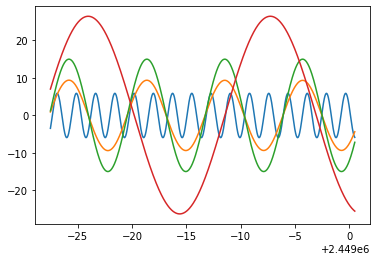

In [23]:
plt.plot(curr_julian_day, X_1)
plt.plot(curr_julian_day, X_2)
plt.plot(curr_julian_day, X_3)
plt.plot(curr_julian_day, X_4)

plt.show()

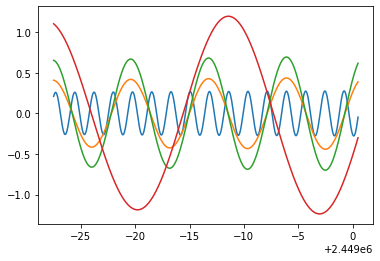

In [24]:
plt.plot(curr_julian_day, Y_1)
plt.plot(curr_julian_day, Y_2)
plt.plot(curr_julian_day, Y_3)
plt.plot(curr_julian_day, Y_4)

plt.show()

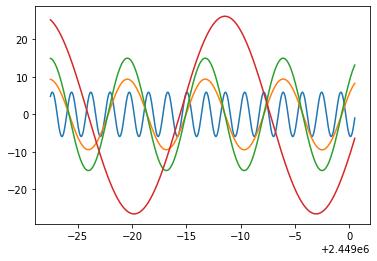

In [25]:
plt.plot(curr_julian_day, Z_1)
plt.plot(curr_julian_day, Z_2)
plt.plot(curr_julian_day, Z_3)
plt.plot(curr_julian_day, Z_4)

plt.show()

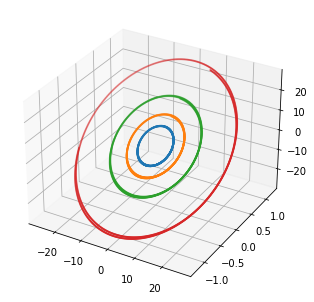

In [26]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_1, Y_1, Z_1, s = 1)
ax.scatter(X_2, Y_2, Z_2, s = 1)
ax.scatter(X_3, Y_3, Z_3, s = 1)
ax.scatter(X_4, Y_4, Z_4, s = 1)

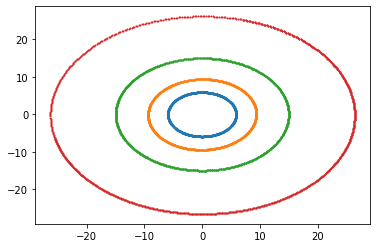

In [27]:
plt.scatter(X_1, Z_1, s = 1)
plt.scatter(X_2, Z_2, s = 1)
plt.scatter(X_3, Z_3, s = 1)
plt.scatter(X_4, Z_4, s = 1)

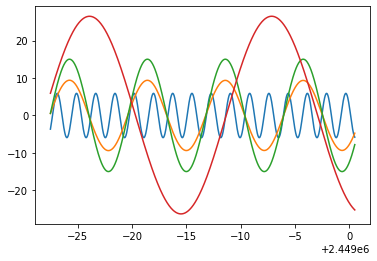

In [28]:
plt.plot(curr_julian_day, X_1-Y_1)
plt.plot(curr_julian_day, X_2-Y_2)
plt.plot(curr_julian_day, X_3-Y_3)
plt.plot(curr_julian_day, X_4-Y_4)

plt.show()